In [1]:
import os
import sys
import pandas as pd

sys.path.insert(0, r'C:\\Users\\Matt\\Documents\\Development\\VolAdjGIPDashboard\\VolAdjGIPDashboard')
#sys.path.insert(0, '/home/matt/src/VolAdjGIPDashboard/VolAdjGIPDashboard')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "VolAdjGIPDashboard.settings")
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import django
django.setup()

In [2]:
from DataAcquisition.models import QuadForecasts
gdp, cpi, latest_date = QuadForecasts.fetch_usa_gi_data() # 20191108, both series verified against FRED.
display(gdp.tail(5))
display(cpi.tail(5))

DATE
2019-09-30    19141.744
2019-12-31    19253.959
2020-03-31    19010.848
2020-06-30    17302.511
2020-09-30    18583.501
Freq: Q-DEC, Name: GDPC1, dtype: float64

2020-06-30 00:00:00    256.860000
2020-09-30 00:00:00    259.766333
2020-12-31             260.095000
2021-03-31             262.463333
2021-06-30             264.373333
dtype: float64

In [3]:
gdp_set, latest_date = QuadForecasts.get_gdp_set(gdp) # issue is probably related to GDPNow. # maybe not; deleted code, still lying to me

In [4]:
gdp_set.tail(20)

growth  best_estimate
quarter    date                               
2020-09-30 2020-10-02  1.033390   17880.243800
           2020-10-09  1.033458   17881.419603
           2020-10-16  1.032823   17870.436407
           2020-10-23  1.032733   17868.865725
           2020-10-30  1.032369   17862.578850
2020-12-31 2020-09-04  1.017700   18912.420068
           2020-09-11  1.017723   18912.860820
           2020-09-18  1.013043   18825.878348
           2020-09-25  1.012393   18813.801153
           2020-10-02  1.011717   18801.252038
           2020-10-09  1.011838   18803.494795
           2020-10-16  1.008759   18746.278346
           2020-10-23  1.008540   18742.203708
           2020-10-30  1.008003   18732.232277
           2020-11-06  1.007075   18714.971297
           2020-11-13  1.007075   18714.971297
           2020-11-20  1.007075   18714.971297
           2020-11-27  1.006977   18713.151571
           2020-12-04  1.006241   18699.486675
2021-03-31 2020-12-04  1.014339   18967.612000

In [5]:
for forecast in QuadForecasts.objects.all().order_by(('date')):
    print(f"quarter_end_date={forecast.quarter_end_date}, date={forecast.date}, quad={forecast.quad}")

quarter_end_date=1951-06-30, date=1951-06-30, quad=3
quarter_end_date=1951-09-30, date=1951-09-30, quad=4
quarter_end_date=1951-12-31, date=1951-12-31, quad=4
quarter_end_date=1952-03-31, date=1952-03-31, quad=4
quarter_end_date=1952-06-30, date=1952-06-30, quad=4
quarter_end_date=1952-09-30, date=1952-09-30, quad=3
quarter_end_date=1952-12-31, date=1952-12-31, quad=1
quarter_end_date=1953-03-31, date=1953-03-31, quad=1
quarter_end_date=1953-06-30, date=1953-06-30, quad=2
quarter_end_date=1953-09-30, date=1953-09-30, quad=4
quarter_end_date=1953-12-31, date=1953-12-31, quad=3
quarter_end_date=1954-03-31, date=1954-03-31, quad=3
quarter_end_date=1954-06-30, date=1954-06-30, quad=4
quarter_end_date=1954-09-30, date=1954-09-30, quad=1
quarter_end_date=1954-12-31, date=1954-12-31, quad=1
quarter_end_date=1955-03-31, date=1955-03-31, quad=1
quarter_end_date=1955-06-30, date=1955-06-30, quad=2
quarter_end_date=1955-09-30, date=1955-09-30, quad=2
quarter_end_date=1955-12-31, date=1955-12-31, 

In [9]:
gdp, cpi, latest_data = QuadForecasts.fetch_usa_gi_data()
usa_quads, latest_data = QuadForecasts.determine_quads(gdp, cpi)

usa_quads = usa_quads[
    (usa_quads.index.get_level_values('date') <= usa_quads.index.get_level_values('quarter')) &
    (usa_quads.index.get_level_values('date') > usa_quads.index.get_level_values('quarter') - pd.offsets.QuarterEnd())
].droplevel('quarter')

usa_quads['changed'] = usa_quads.quad != usa_quads.shift(1).quad
#usa_quads = usa_quads[usa_quads.changed == True].drop(['changed'], axis='columns')

In [10]:
usa_quads.tail(20)

,gdp_roc,cpi_roc,quad,changed
date,,,,
2020-07-24,229.262065,85.808995,2.0,False
2020-07-31,301.263887,85.808995,2.0,False
2020-08-07,255.284795,85.808995,2.0,False
2020-08-14,259.363121,85.808995,2.0,False
2020-08-21,256.100887,85.808995,2.0,False
2020-08-28,269.332543,85.808995,2.0,False
2020-09-04,275.623325,85.808995,2.0,False
2020-09-11,276.636781,85.808995,2.0,False
2020-09-18,248.952826,85.808995,2.0,False


In [59]:
from DataAcquisition.models import QuadReturn, YahooHistory
quad_returns = pd.DataFrame(
    QuadReturn.objects.all().order_by('data_end_date').values_list(
        'quarter_end_date', 'data_end_date', 'label', 'quad_return', 'quad_stdev'
    ), columns = ['quarter_end_date', 'data_end_date', 'label', 'quad_return', 'quad_stdev']
)

max drawdown = 0.0


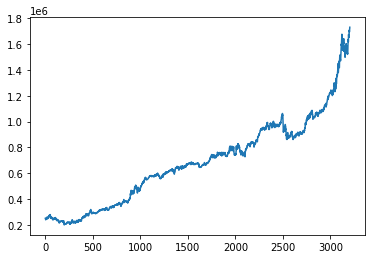

In [81]:
# Quick and dirty backtesting of a trend following strategy using this framework

cash_value = 250000.0

positioning = None
cost_basis = None

total_value_history = [cash_value]

for date, subframe in quad_returns.groupby('data_end_date'):
    best_performance = None
    best_label = None
    
    for identity, quarter_end_date, data_end_date, label, quad_return, quad_stdev in subframe.itertuples():
        if quad_stdev == 0:
            continue
        
        this_score = quad_return / quad_stdev
        if best_performance is None or this_score > best_performance:
            best_performance = this_score
            best_label = label
    
    current_prices = YahooHistory.objects.filter(ticker__in=['QQQ', 'XLI', 'XLF', 'GLD', 'TLT', 'UUP', 'XLU'], date=date)
    if not current_prices:
        continue
    
    # liquidate positions
    if positioning is not None:
        for ticker in positioning:
            cash_value += positioning[ticker]*current_prices.get(ticker=ticker).close_price - 
        
        positioning = None
    
    total_value_history.append(cash_value)
    
    # add positions
    positioning = YahooHistory.equal_volatility_position(best_label.split(','), max_date=date, target_value=cash_value)
    cost_basis = dict()
    
    for ticker in positioning:
        price = current_prices.get(ticker=ticker).close_price
        cash_value -= positioning[ticker]*price
        cost_basis[ticker] = price       
    
import matplotlib.pyplot as plt
plt.plot(total_value_history)
print(f"max drawdown = {max_drawdown}")


In [85]:
high_water_mark = None
low_water_mark = None
max_drawdown = None

last_value = None
returns = list()

for value in total_value_history:
    if high_water_mark is None or value > high_water_mark:
        high_water_mark = value
    if low_water_mark is None or value < low_water_mark:
        low_water_mark = value
    
    if max_drawdown is None or (value < high_water_mark and value/high_water_mark - 1 < max_drawdown):
        max_drawdown = value/high_water_mark - 1
        
    if last_value is not None:
        returns.append(value/last_value - 1)
    last_value = value
        
print(f"max_drawdown={max_drawdown*100:.2f}%")
    

max_drawdown=-28.73%


In [90]:
import numpy as np

print(f"mean daily return: {np.mean(returns)*100:.2f}%")
print(f"mean daily stdev: {np.std(returns)*100:.2f}%")
print(f"performance ratio: {np.mean(returns)/np.std(returns)}")

mean daily return: 0.06%
mean daily stdev: 0.95%
performance ratio: 0.06816410043495773
